 ╔══<i><b>Alai-DeepLearning</b></i>════════════════════════════╗
###  &nbsp;&nbsp; **✎&nbsp;&nbsp;Week 5. Machine Learning Basis**
# Section 8. Model Evaluation

### _Objective_
1. 모델을 평가하기 위해, Test Set과 Train Set을 나누는 방식에 대해 배워봅니다. <br>
2. 모델을 평가하는 여러 지표에 대해 배워봅니다.
╚═════════════════════════════════════════╝

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

## 예제 데이터 ) 암 환자 데이터 셋

In [2]:
!wget https://s3.ap-northeast-2.amazonaws.com/pai-datasets/alai-deeplearning/cancer_dataset.csv
cancer_df = pd.read_csv('cancer_dataset.csv')

--2019-03-28 16:41:34--  https://s3.ap-northeast-2.amazonaws.com/pai-datasets/alai-deeplearning/cancer_dataset.csv
Resolving s3.ap-northeast-2.amazonaws.com (s3.ap-northeast-2.amazonaws.com)... 52.219.56.101
Connecting to s3.ap-northeast-2.amazonaws.com (s3.ap-northeast-2.amazonaws.com)|52.219.56.101|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2958 (2.9K) [text/csv]
Saving to: ‘cancer_dataset.csv.3’

cancer_dataset.csv. 100%[===================>]   2.89K  --.-KB/s    in 0s      

2019-03-28 16:41:34 (10.9 MB/s) - ‘cancer_dataset.csv.3’ saved [2958/2958]



In [3]:
cancer_df.describe()

,age,tumor_size,label
count,100.000000,100.000000,100.00
mean,4.218584,4.463655,0.45
std,1.949688,2.264897,0.50
min,0.494542,0.656397,0.00
25%,2.750747,2.832193,0.00
50%,3.849528,3.766226,0.00
75%,5.405780,5.921538,1.00
max,9.670666,11.170589,1.00


### 데이터 시각화

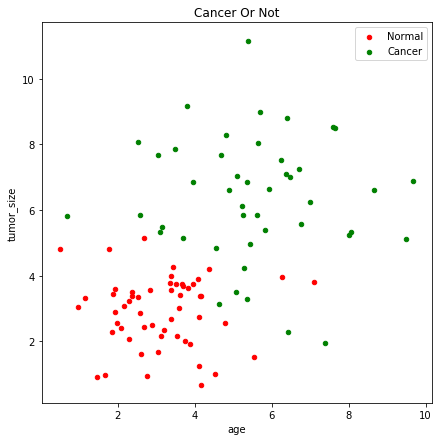

In [4]:
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(1,1,1)

# 0: 정상
cancer_df[cancer_df.label==0].plot('age','tumor_size',ax=ax,legend=True,
                                   kind='scatter',color='red')
# 1: 암환자
cancer_df[cancer_df.label==1].plot('age','tumor_size',ax=ax,legend=True,
                                   kind='scatter',color='green')
plt.legend(['Normal','Cancer'])
plt.title("Cancer Or Not")
plt.show()

<br><br>

# \[ 1. Train-Test Set 분리 \]

----

----

> *우리가 만들 모델의 성능을 평가하기 위해서, 우리는 테스트 데이터셋이 필요합니다.*<br>
> *테스트 데이터셋은 학습 과정에 이용되지 않아야만 합니다.*

## 1. Random Split

----

* 일반적으로 많이 적용하는 방식의 train/test 분리입니다.
* 보통 학습 데이터셋과 평가 데이터셋은 8:2정도로 많이 합니다.

In [5]:
train_df = cancer_df.sample(frac=0.8,random_state=10) # 80%
test_df = cancer_df.drop(train_df.index) # test 데이터셋 이외 20%

In [6]:
train_df.label.value_counts()

0.0    43
1.0    37
Name: label, dtype: int64

In [7]:
test_df.label.value_counts()

0.0    12
1.0     8
Name: label, dtype: int64

<br>
## 2. stratified Random Split
---

* 난수로 분리하게 될 경우에는, 위와 같이 데이터 셋 내 라벨의 비율이 달라질 수 있습니다.<br>
* 라벨의 비율에 따라서 성능 결과가 다르게 나올 수 있습니다.<br>
* 라벨의 비율을 맞춰 난수추출하는 메소드는 아래처럼 하면 쉽게 할 수 있습니다.

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
train_df,test_df = train_test_split(cancer_df,
                                    stratify=cancer_df.label,
                                    test_size=0.8)

In [10]:
train_df.label.value_counts()

0.0    11
1.0     9
Name: label, dtype: int64

In [11]:
test_df.label.value_counts()

0.0    44
1.0    36
Name: label, dtype: int64

## 3. K-Fold 교차검증
---

* 위와 데이터의 수가 적은 경우에는 이 데이터 중의 일부인 |평가 데이터의 수도 적기 때문에<br>
* 평가의 신뢰도가 낮아집니다. 이렇다고 평가 데이터 수를 늘리면 학습이 잘 되지 않습니다. <br>
* 위와 같은 경우를 위해 만들어진 방식이 K-Fold 교차검증 방법입니다.


![Imgur](https://i.imgur.com/ZBRaany.png)

K-Fold 교차검증도 아래와 같은 메소드를 이용하면 간단히 이용할 수 있습니다.

In [12]:
from sklearn.model_selection import KFold

cv = KFold(5, shuffle=True)

for i, (train_index, test_index) in enumerate(cv.split(cancer_df)):
    train_df = cancer_df.iloc[train_index]
    test_df = cancer_df.iloc[test_index]
    
    # 이후 학습을 한 후 평가
    # 학습
    # 평가
    # 5번 반복

<br><br>

# \[ 2. 모델을 평가하는 지표들 \]

----

----

> *모델의 성능을 평가하는 여러가지 지표들이 존재합니다. *<br>

## 1. 모델 결과 산출하기
---

* 학습데이터셋 만으로 우선 모델을 학습합니다.
* 테스트셋에 학습된 모델을 적용하여 결과를 얻습니다.


### (1) 모델 학습하기

In [13]:
# MinMax Normalization 적용
cancer_df = (cancer_df-cancer_df.min())/(cancer_df.max()-cancer_df.min())

# Train / test split
train_df,test_df = train_test_split(cancer_df,
                                    stratify=cancer_df.label,
                                    test_size=0.2)

x_1 = train_df.tumor_size
x_2 = train_df.age
y = train_df.label

In [14]:
# weight 모두 0.1로 초기화
w_0,w_1,w_2 = np.random.random(3)

# 갱신된 weight와 mse 저장
w_0_history = [w_0]
w_1_history = [w_1]
w_2_history = [w_2]
loss_history = []

alpha = 3e-1 # 학습률
epoch = 1000

for i in range(epoch):
    # 이전 가중치 가져오기
    old_w_0 = w_0_history[-1]
    old_w_1 = w_1_history[-1]
    old_w_2 = w_2_history[-1]    
    
    # 미분값 갱신
    z = old_w_0 + (old_w_1*x_1) + (old_w_2*x_2)
    prob = 1/(1+np.exp(-z))
    
    dw0 = np.mean(prob-y)
    dw1 = np.mean((prob-y)*x_1)
    dw2 = np.mean((prob-y)*x_2)
    
    # 경사_하강법을 통한 가중치 갱신
    new_w_0 = old_w_0 - alpha * dw0
    new_w_1 = old_w_1 - alpha * dw1
    new_w_2 = old_w_2 - alpha * dw2
    
    crossentropy = -np.mean(y*np.log(prob) + (1-y)*np.log(1-prob))

    # 결과 저장
    w_0_history.append(new_w_0)
    w_1_history.append(new_w_1)
    w_2_history.append(new_w_2)
    loss_history.append(crossentropy)

### (2) 모델 학습 결과 확인하기

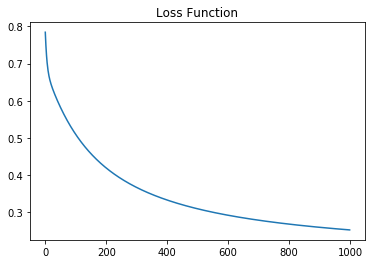

In [15]:
plt.title("Loss Function")
plt.plot(loss_history)
plt.show()

### (3) 테스트셋에 적용하기

In [ ]:
def predict_model(x_1,x_2,w_0,w_1,w_2):
    z = w_0 + (w_1*x_1) + (w_2*x_2)
    prob = 1/(1+np.exp(-z))
    return prob

In [17]:
test_x_1 = test_df.tumor_size
test_x_2 = test_df.age
test_y = test_df.label

In [18]:
test_y_pred = predict_model(test_x_1,test_x_2,
                            new_w_0,new_w_1,new_w_2)

## 2. 다양한 종류의 평가 지표들
---

학습한 모델의 성능을 평가하는 기준들은 다양합니다.<br>
주어진 문제 상황에 맞게, 모델을 어떤 기준으로 평가할 수 있을지<br>
설계할 수 있어야 합니다.

In [19]:
# 평가 결과에 대한 데이터 프레임 만들기
result_df = pd.DataFrame({
    "label" : test_y,
    "prediction" : test_y_pred}
)
result_df.head()

,label,prediction
52,0.0,0.037086
91,0.0,0.297727
26,0.0,0.305803
85,0.0,0.120379
25,0.0,0.065967


In [20]:
# cut-value를 0.5라 지정했을 때 결과
labels = (result_df
          .label
          .apply(lambda x: True if x>0.5 else False))
predictions = (result_df
               .prediction
               .apply(lambda x: True if x>0.5 else False))

pd.concat([labels,predictions],axis=1).head(5)

,label,prediction
52,False,False
91,False,False
26,False,False
85,False,False
25,False,False


### (1) Confusion Matrix
----

Confusion Matrix란 분류 모델의 성능을 평가하기 위한 가장 기본이 되는 행렬입니다.

![Imgur](https://i.imgur.com/9uGE2UL.png)

In [21]:
TP = np.sum(labels & predictions)
FN = np.sum(labels & (~predictions))
FP = np.sum((~labels) & predictions)
TN = np.sum((~labels) & (~predictions))

In [22]:
print("(TP,FN,FP,TN) : ({},{},{},{})".format(TP,FN,FP,TN))

(TP,FN,FP,TN) : (7,2,1,10)


위의 정보가 있으면 우리는 여러가지 기준으로 모델을 평가할 수 있습니다.

### (2) Accuracy 

전체적으로 이 분류기가 얼마나 잘 맞추었는지를 평가할 때 쓰입니다.

$$
accuracy = \frac{TP+TN}{TP+FN+FP+TN}
$$

In [23]:
accuracy = (TP+TN)/(TP+FN+FP+TN)
print("정확도 : {:2.3f}%".format(accuracy*100))

정확도 : 85.000%


### (3) Error Rate

얼마나 자주 틀렸는지를 평가할 때 쓰입니다.<br>
주로 "Error가 20% 감소하였습니다."와 같이 이야기할 때 쓰이는 수치입니다.
$$
error\ rate = \frac{FP+FN}{TP+FN+FP+TN} = 1 - accuracy
$$

In [24]:
error_rate = (FP+FN)/(TP+FN+FP+TN)
print("에러율 : {:2.3f}%".format(error_rate*100))

에러율 : 15.000%


### (4) Recall(Sensitivity, 재현율)
실제 정답 중 모델에서 올바르게 분류한 비율을 의미합니다.<br>
암세포 검출 등 놓치면 안되는 분류 문제에 있어서는 <br>
Recall을 매우 높게 설정해야 합니다.

$$
recall = \frac{TP}{TP+FN}
$$

In [25]:
recall = TP/(TP+FN)
print("재현율 : {:2.3f}%".format(recall*100))

재현율 : 77.778%


### (5) Precision(정밀도)
모델이 예측한 정답 중 실제 정답의 비율을 의미합니다.<br>
정밀도가 높을수록, False Alarm 문제가 적게 발생합니다.

$$
precision = \frac{TP}{TP+FP}
$$

In [26]:
precision = TP/(TP+FP)
print("정밀도 : {:2.3f}%".format(precision*100))

정밀도 : 87.500%


### (6) F1-Score

재현율과 정밀도는 trade-off관계에 있습니다.<br>
이를 평균내어 단일한 값으로 평가하는 방식이 바로 F-score입니다.

$$
F = \frac{recall * precision}{recall + precision}
$$

In [27]:
F = (recall*precision)/(recall+precision)
print("F1-score : {:.3f}".format(F))

F1-score : 0.412


### (7) ROC Curve

cut value에 따라서 정밀도와 재현율의 결과는 달라지게 됩니다. <br>
우리는 cut value에 따른 모델의 성능을 보여주는 그래프로 주로 **ROC Curve**를 이용합니다.

In [37]:
def calculate_tpr_and_fpr(cut_value):
    predictions = (result_df
                   .prediction
                   .apply(lambda x: True if x>=cut_value else False))
    
    TP = np.sum(labels & predictions)
    FN = np.sum(labels & (~predictions))
    FP = np.sum((~labels) & predictions)
    TN = np.sum((~labels) & (~predictions))
    
    tpr = TP/(TP+FN) # 참 양성 비율(재현율과 동일)
    fpr = FP/(FP+TN) # 허위 양성 비율
    
    return tpr, fpr

In [38]:
tpr, fpr = calculate_tpr_and_fpr(0.1)
print("cutvalue:0.1 -> tpr : {:.3f}/fpr : {:.3f}".format(tpr, fpr))

tpr, fpr = calculate_tpr_and_fpr(0.3)
print("cutvalue:0.3 -> tpr : {:.3f}/fpr : {:.3f}".format(tpr, fpr))

tpr, fpr = calculate_tpr_and_fpr(0.5)
print("cutvalue:0.5 -> tpr : {:.3f}/fpr : {:.3f}".format(tpr, fpr))


cutvalue:0.1 -> tpr : 1.000/fpr : 0.636
cutvalue:0.3 -> tpr : 1.000/fpr : 0.182
cutvalue:0.5 -> tpr : 0.778/fpr : 0.091


In [39]:
cut_values = np.linspace(0.0,1.,100)

tpr_list = []
fpr_list = []
for cut_value in cut_values:
    tpr, fpr = calculate_tpr_and_fpr(cut_value)
    tpr_list.append(tpr)
    fpr_list.append(fpr)    

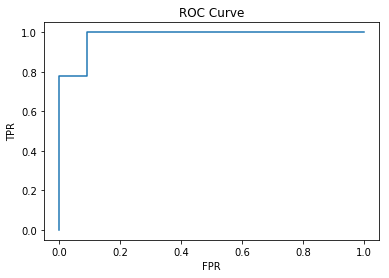

In [40]:
plt.title("ROC Curve")
plt.plot(fpr_list,tpr_list)
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

### (8) AUC

AUC는 "ROC 곡선 아래 영역"을 의미합니다.<br>
예측이 100% 잘못된 모델의 AUC는 0.0이고 <br>
예측이 100% 정확한 모델의 AUC는 1.0입니다. <br>

In [49]:
prev_fpr = fpr_list[0]
prev_tpr = tpr_list[0]

AUC = 0
for curr_fpr, curr_tpr in zip(fpr_list[1:],tpr_list[1:]):
    segment = (prev_fpr-curr_fpr)*(curr_tpr + prev_tpr)/2
    AUC += segment
    prev_fpr, prev_tpr = curr_fpr, curr_tpr
print(AUC)

0.9797979797979798


#  

---

    Copyright(c) 2019 by Public AI. All rights reserved.<br>
    Writen by PAI, SangJae Kang ( rocketgrowthsj@publicai.co.kr )  last updated on 2019/03/22

---